<a href="https://colab.research.google.com/github/prithvi-diwanji/NLP2024_exercises/blob/main/machinelearning_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#download dataset

In [8]:
#name: news_data.csv
#location: https://mitu.co.in/dataset
#download and save it current working directory
import os
os.getcwd()

'/content'

In [9]:
os.listdir(os.getcwd())

['.config', 'news_data.csv', 'sample_data']

In [10]:
#what is the meaning of the dataset? very big adata set
#classify some new news as fake or not fake?

In [11]:
#import all libraries
import pandas as pd
#visualization libraries
import matplotlib.pyplot as plt

In [12]:
#prepare the data perfectly first
#read the data
df=pd.read_csv('news_data.csv')

In [13]:
df.shape

(9900, 2)

In [14]:
df.columns

Index(['Text', 'label'], dtype='object')

In [15]:
## separate the input and output data first
# in supervised learning there a re features and labels
features=df['Text'] #input data
label=df['label']#outout data


In [16]:
features.head() #x

0     Top Trump Surrogate BRUTALLY Stabs Him In The...
1    U.S. conservative leader optimistic of common ...
2    Trump proposes U.S. tax overhaul, stirs concer...
3     Court Forces Ohio To Allow Millions Of Illega...
4    Democrats say Trump agrees to work on immigrat...
Name: Text, dtype: object

In [17]:
label #y

0       Fake
1       Real
2       Real
3       Fake
4       Real
        ... 
9895    Fake
9896    Real
9897    Real
9898    Fake
9899    Fake
Name: label, Length: 9900, dtype: object

In [18]:
set(label)

{'Fake', 'Real'}

<Axes: xlabel='label', ylabel='count'>

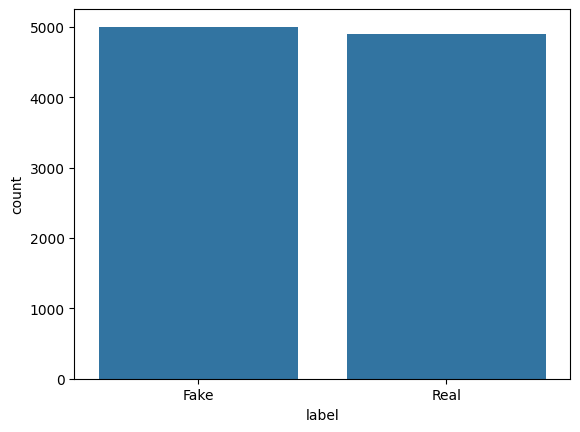

In [19]:
import seaborn as sns
sns.countplot(x=label)

In [20]:
import matplotlib.pyplot as plt

Data cleaning

In [21]:
## clean the data for training the model

In [22]:
#get packages, tokenize, ....and give keywords
#get stopwords/keywords
#give weightage using tfid vectorizer

In [23]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [24]:
#apply tokenizer to a single sentence first and then to the corpus our data

In [25]:
sent= 'Hello friends! How are you? I like Python Programming.'

In [26]:
#tokenize
tokens1 = word_tokenize(sent)

In [27]:
tokens1

['Hello',
 'friends',
 '!',
 'How',
 'are',
 'you',
 '?',
 'I',
 'like',
 'Python',
 'Programming',
 '.']

In [28]:
#remove punctuations and get only alphanumeric, get all data in lowercase


In [29]:
tokens2 = [x.lower() for x in tokens1 if x.isalpha()]

In [30]:
tokens2

['hello', 'friends', 'how', 'are', 'you', 'i', 'like', 'python', 'programming']

In [31]:
#remove stopwords
nltk.download('stopwords')
swords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [32]:
swords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
tokens3 = [x for x in tokens2 if x not in swords]

In [34]:
tokens3

['hello', 'friends', 'like', 'python', 'programming']

In [35]:
#remove stems and suffixes, we need stemmer lancaster or porter stemmer
ps = PorterStemmer()


In [36]:
tokens4 = [ps.stem(x) for x in tokens3]

In [37]:
tokens4

['hello', 'friend', 'like', 'python', 'program']

In [38]:
#finallly these are the root words we get and this u can apply to any sentence
# we want a function to clean the text like above for text cleaning
def clean_text(sent):
  tokens1 = word_tokenize(sent)
  tokens2 = [x.lower() for x in tokens1 if x.isalpha()]
  tokens3 = [x for x in tokens2 if x not in swords]
  tokens4 = [ps.stem(x) for x in tokens3]
  return tokens4


In [39]:
tokens4

['hello', 'friend', 'like', 'python', 'program']

In [40]:
#apply this function before applying vectorization

In [41]:
clean_text(sent)

['hello', 'friend', 'like', 'python', 'program']

In [42]:
new_sent= 'It was the expected result. They told the same on fields.'

In [43]:
clean_text(new_sent)

['expect', 'result', 'told', 'field']

In [44]:
features[123]

' Ranking Dem On House Russia Probe Has EXPLOSIVE News For Trump That Will Have Him Running Scared As everybody who still believes in democracy and true freedom reels from FBI Director James Comey s firing, the media and members of Congress have been frantically working to get the deets on what happened. Rep. Adam Schiff, the ranking member of the House Intelligence Committee (which is conducting its own investigation into Russia), just dropped a truth bomb about Comey, and Trump would be wise to go find a cave and hide in it now.Schiff was asked, on CNN, whether he believes this is a cover-up. He doesn t. He thinks it s something worse: It s a brazen interference with a criminal investigation. After all, the president calls this whole investigation a fake, and here you had an FBI director who was seriously looking into whether Trump associates were colluding with the Russians. The end of his statement to CNN should be particularly jarring to anybody familiar with history. Watch below:

In [45]:
clean_text(features[123]) # apply function to any news --our data set input

['rank',
 'dem',
 'hous',
 'russia',
 'probe',
 'explos',
 'news',
 'trump',
 'run',
 'scare',
 'everybodi',
 'still',
 'believ',
 'democraci',
 'true',
 'freedom',
 'reel',
 'fbi',
 'director',
 'jame',
 'comey',
 'fire',
 'media',
 'member',
 'congress',
 'frantic',
 'work',
 'get',
 'deet',
 'happen',
 'adam',
 'schiff',
 'rank',
 'member',
 'hous',
 'intellig',
 'committe',
 'conduct',
 'investig',
 'russia',
 'drop',
 'truth',
 'bomb',
 'comey',
 'trump',
 'would',
 'wise',
 'go',
 'find',
 'cave',
 'hide',
 'ask',
 'cnn',
 'whether',
 'believ',
 'think',
 'someth',
 'wors',
 'brazen',
 'interfer',
 'crimin',
 'investig',
 'presid',
 'call',
 'whole',
 'investig',
 'fake',
 'fbi',
 'director',
 'serious',
 'look',
 'whether',
 'trump',
 'associ',
 'collud',
 'russian',
 'end',
 'statement',
 'cnn',
 'particularli',
 'jar',
 'anybodi',
 'familiar',
 'histori',
 'watch',
 'adam',
 'schiff',
 'fire',
 'fbi',
 'director',
 'jame',
 'comey',
 'brazen',
 'interfer',
 'crimin',
 'investi

Vectorization TF IDF

In [46]:
!pip install scikit-learn
#import the class
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
#create the object
tfidf = TfidfVectorizer(analyzer=clean_text)

In [48]:
#perform the operation
features_new = tfidf.fit_transform(features)


In [49]:
features_new.shape

(9900, 33562)

In [50]:
len(tfidf.get_feature_names_out())

33562

In [51]:
#data is expanded and we got the unique columns

In [52]:
#now logical understanding - one more thing is needed
#afte training how to find accuravy of model?
# before going to nxt step, evalute the algorithm. we need evaluation methods see ppt

In [53]:
#cross validation - how do i know how algo performs on unknown data?
#when new news comes i want to predict if it is real or fake?

In [54]:
#total number of entries are 33562

Cross validation

In [55]:
#import the function
from sklearn.model_selection import train_test_split

In [56]:
#perform cross validation
x_train, x_test, y_train, y_test = train_test_split(features_new, label, random_state=0)

In [57]:
x_train.shape

(7425, 33562)

In [58]:
x_test.shape

(2475, 33562)

In [59]:
#we have split the data

In [60]:
y_train.shape

(7425,)

In [61]:
y_test.shape

(2475,)

In [62]:
#machine learning logic is present in sklearn

In [63]:
#now we train using logic , build the model

In [64]:
#build the decision tree algorithm model on the trainign data

In [65]:
#import the class
from sklearn.tree import DecisionTreeClassifier

In [66]:
#crete the object
dt=DecisionTreeClassifier(random_state=0)


In [67]:
#train the data
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [68]:
from sklearn.tree import plot_tree

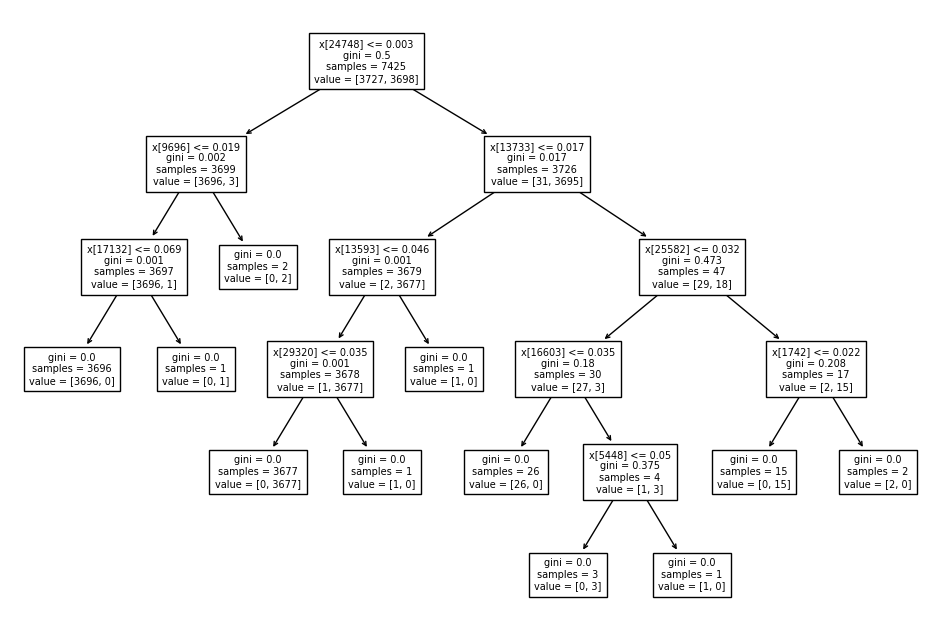

In [78]:
plt.figure(figsize=(12,8))
plot_tree(dt,fontsize=7);

In [81]:
#what does the feature look like?
tfidf.get_feature_names_out()[9696] - example with 9696

'factbox'

In [70]:
#how accurate is this model? check 2475 test data

In [71]:
## performance evaluation

In [72]:
#predict the result on test data
y_pred =dt.predict(x_test)

In [73]:
y_pred

array(['Fake', 'Fake', 'Fake', ..., 'Fake', 'Fake', 'Fake'], dtype=object)

In [74]:
len(y_pred)

2475

In [75]:
#match y pred with y test

Confusion Matrix - how many fasle postive and false negative as a matxi

In [82]:
#import the class
from sklearn.metrics import ConfusionMatrixDisplay

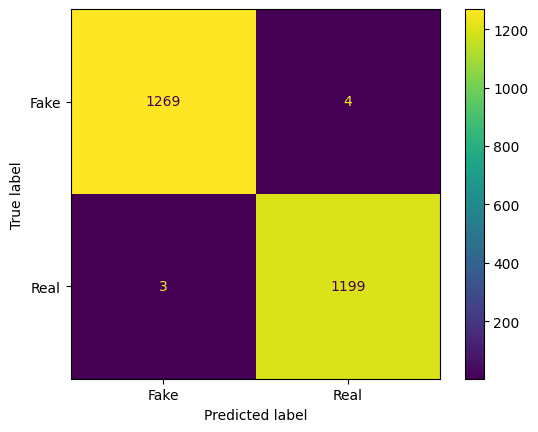

In [83]:
#show the matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [84]:
(1269+1199)/2475

0.9971717171717172

In [87]:
#fake class recall
1269/1273

0.9968578161822467

In [88]:
#real class recall
1199/1202

0.997504159733777

In [89]:
#if new  news comes unseen data what is the prediction on new news? perform predictions on it?
#use sample news.txt file as test file


In [91]:
#open the file
f=open('sample_news.txt')

In [92]:
news=f.readlines()

In [97]:
news

['" Donald Trump’s ‘Charity’ Foundation Is About To Be Shut The F**k Down NATIONWIDE Things really aren t looking too great for Donald Trump s charity foundation. With recent developments prohibiting the Trump Foundation from soliciting funds in New York state, it s now looking like a good majority of states may be following suit.The Trump Foundation has also been being looked at by the Attorney General for how it is getting and spending funds, especially after what happen with veterans organizations earlier this year.According to The Daily Beast: To make matters worse for the Trump Foundation, the probe may not be limited to New York: Charity experts and lawyers tell The Daily Beast that the attorneys general of other states may soon get involved in a long, drawn-out process.All major charities are required to register with 41 different states across the nation in order to individually request permission to fundraise. When Trump raised money for veterans, he may have broken the rules 

In [98]:
#predict function but vectorize the file first

In [99]:
tfidf.transform(news)

<3x33562 sparse matrix of type '<class 'numpy.float64'>'
	with 325 stored elements in Compressed Sparse Row format>

In [100]:
dt.predict(tfidf.transform(news))

array(['Fake', 'Real', 'Fake'], dtype=object)

In [101]:
len(news)

3